In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [60]:
omnify = pd.read_excel(r"C:\Users\kkdhi\Downloads\Omnify-Analyst-Intership-Task.xlsx")

In [61]:
omnify.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [62]:
omnify.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239
std,1.900840,46.743636,14.253019,0.167185,0.285312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.800000,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


In [63]:
omnify.shape

(418, 14)

In [64]:
omnify.isnull().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

# Impute the missing data

In [65]:
omnify.dropna()
omnify['Search Keyword'].fillna('Not Provided', inplace=True)

In [66]:
omnify.isnull().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      0
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

# Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format.

In [67]:
omnify['Week'] = pd.to_datetime(omnify['Week'])

weekly_report = omnify.groupby('Week').agg({
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
})


weekly_report['ROAS'] = weekly_report['Prospects'] / weekly_report['Cost ($)']


In [68]:
print("Weekly Report:")
print(weekly_report)

Weekly Report:
            Cost ($)  Leads  Prospects  Clicks  Impressions      ROAS
Week                                                                 
2021-01-25    154.79      1          2      15          319  0.012921
2021-02-01    192.58      0          1      19          373  0.005193
2021-02-08    216.13      0          1      21          364  0.004627
2021-02-15    235.30      0          2      35          671  0.008500
2021-02-22    190.90      0          1      22          478  0.005238
2021-03-01    141.40      0          1      14          407  0.007072
2021-03-08    258.20      3          1      34          503  0.003873
2021-03-15    184.36      1          0      22          468  0.000000
2021-03-22    308.73      1          4      46          659  0.012956
2021-03-29    172.11      0          0      39          586  0.000000
2021-04-05    176.96      2          0      29          461  0.000000
2021-04-12    137.21      1          4      24          324  0.029152
2021-

In [69]:
monthly_report = omnify.groupby(omnify['Week'].dt.to_period('M')).agg({
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
})


monthly_report['ROAS'] = monthly_report['Prospects'] / monthly_report['Cost ($)']

In [70]:
print("Monthly Report:")
print(monthly_report)

Monthly Report:
         Cost ($)  Leads  Prospects  Clicks  Impressions      ROAS
Week                                                              
2021-01    154.79      1          2      15          319  0.012921
2021-02    834.91      0          5      97         1886  0.005989
2021-03   1064.80      5          6     155         2623  0.005635
2021-04    504.81      5          5      89         1600  0.009905
2021-05    229.37      1          3      31          537  0.013079


In [71]:
print("Weekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)

Weekly Report:
            Cost ($)  Leads  Prospects  Clicks  Impressions      ROAS
Week                                                                 
2021-01-25    154.79      1          2      15          319  0.012921
2021-02-01    192.58      0          1      19          373  0.005193
2021-02-08    216.13      0          1      21          364  0.004627
2021-02-15    235.30      0          2      35          671  0.008500
2021-02-22    190.90      0          1      22          478  0.005238
2021-03-01    141.40      0          1      14          407  0.007072
2021-03-08    258.20      3          1      34          503  0.003873
2021-03-15    184.36      1          0      22          468  0.000000
2021-03-22    308.73      1          4      46          659  0.012956
2021-03-29    172.11      0          0      39          586  0.000000
2021-04-05    176.96      2          0      29          461  0.000000
2021-04-12    137.21      1          4      24          324  0.029152
2021-

# Which is the most profitable channel

In [72]:
# Calculate returns on ad spends (ROAS) for each channel
omnify['ROAS'] = omnify['Prospects'] / omnify['Cost ($)']

channel_roas = omnify.groupby('Campaign')['ROAS'].mean()

most_profitable_channel = channel_roas.idxmax()
highest_roas = channel_roas.max()

print(f"The most profitable channel is '{most_profitable_channel}' with a ROAS of {highest_roas:.6f}.")

The most profitable channel is 'EK_Generic_Swimming' with a ROAS of 0.009591.


# Which category/keyword is the most profitable

In [73]:
keyword_roas = omnify.groupby('Search Keyword')['ROAS'].mean()

most_profitable_keyword = keyword_roas.idxmax()
highest_roas = keyword_roas.max()

print(f"The most profitable category/keyword is '{most_profitable_keyword}' with a ROAS of {highest_roas:.6f}.")

The most profitable category/keyword is 'pool reservation software' with a ROAS of 0.016022.


# Look for insights by analyzing data points on time series graphs

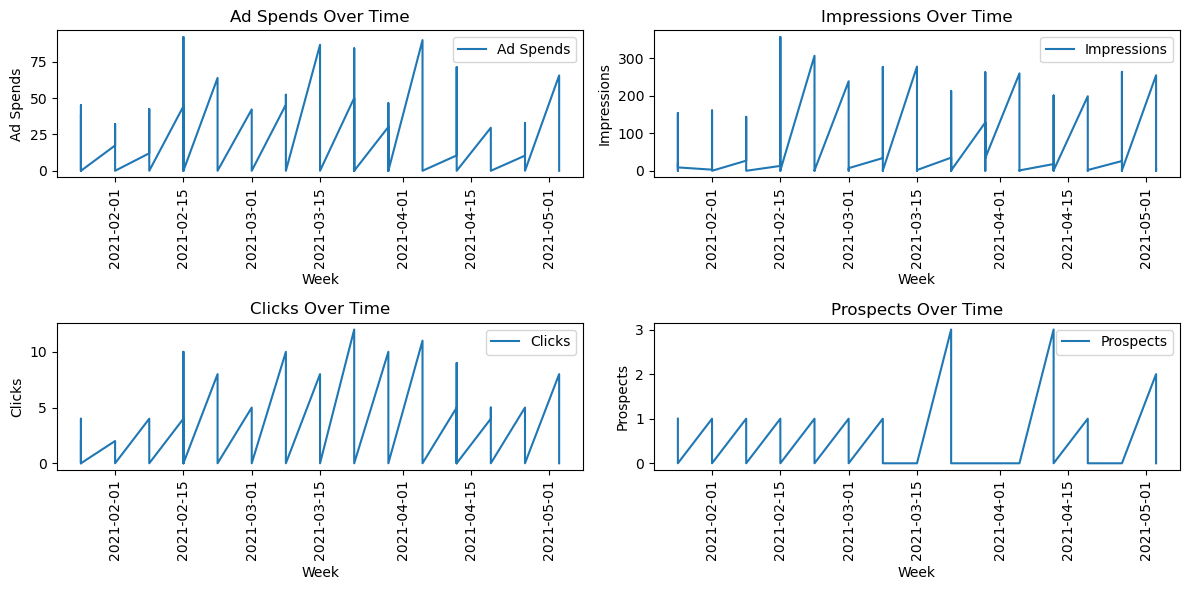

In [74]:
omnify['Week'] = pd.to_datetime(omnify['Week'])

omnify.set_index('Week', inplace=True)


plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(omnify['Cost ($)'], label='Ad Spends')
plt.title('Ad Spends Over Time')
plt.xlabel('Week')
plt.ylabel('Ad Spends')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(omnify['Impressions'], label='Impressions')
plt.title('Impressions Over Time')
plt.xlabel('Week')
plt.xticks(rotation=90)
plt.ylabel('Impressions')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(omnify['Clicks'], label='Clicks')
plt.title('Clicks Over Time')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(omnify['Prospects'], label='Prospects')
plt.title('Prospects Over Time')
plt.xlabel('Week')
plt.ylabel('Prospects')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()
# This code will plot four time series graphs for key metrics: ad spends, impressions, clicks, and prospects. You can visualize other metrics as well by adding more subplots. The x-axis represents time (weeks), and the y-axis represents the corresponding metric values.


# Analyse the Impact of geography

In [75]:
grouped_data = omnify.groupby('Country').mean()
print(grouped_data[['Clicks', 'Impressions', 'Prospects', 'Cost ($)']])

           Clicks  Impressions  Prospects  Cost ($)
Country                                            
USA      0.925837    16.662679   0.050239  6.671483


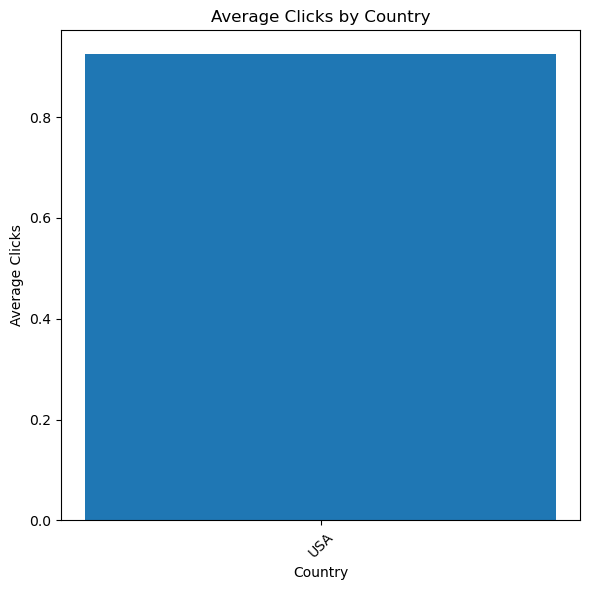

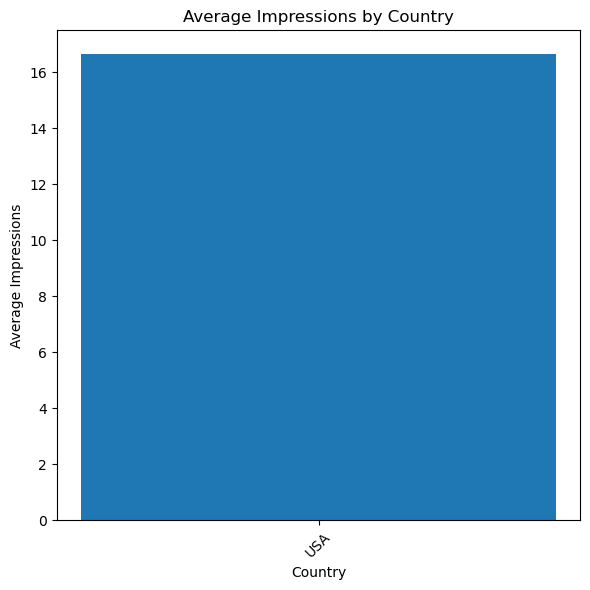

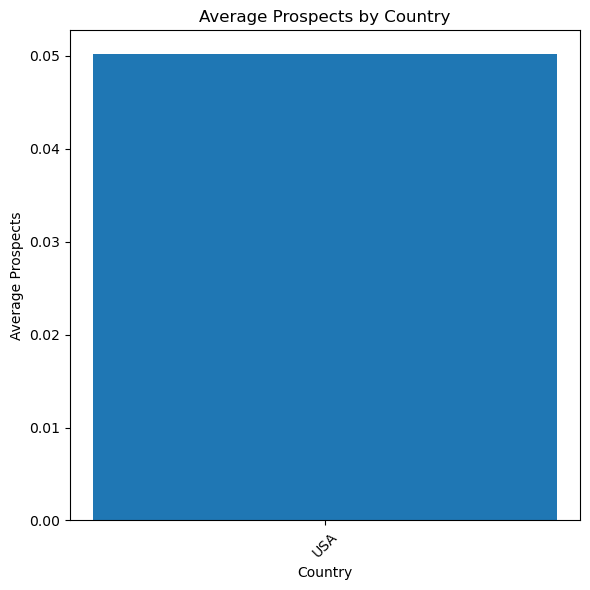

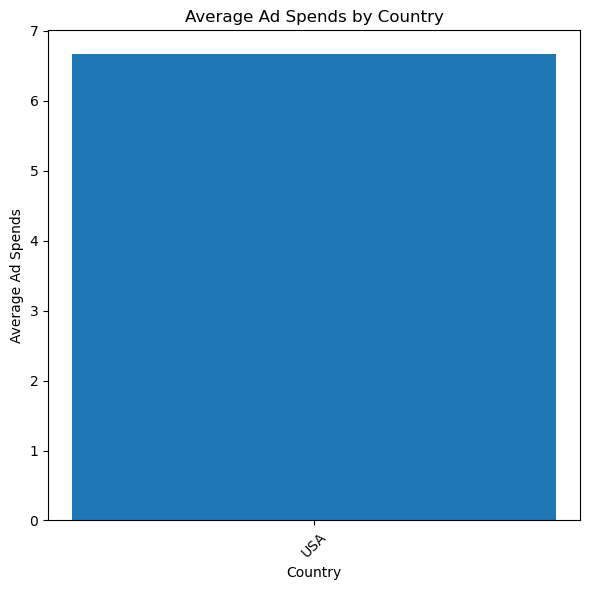

In [76]:
# Plot bar chart for average clicks by country
plt.figure(figsize=(6, 6))
plt.bar(grouped_data.index, grouped_data['Clicks'])
plt.xlabel('Country')
plt.ylabel('Average Clicks')
plt.title('Average Clicks by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average impressions by country
plt.figure(figsize=(6, 6))
plt.bar(grouped_data.index, grouped_data['Impressions'])
plt.xlabel('Country')
plt.ylabel('Average Impressions')
plt.title('Average Impressions by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average prospects by country
plt.figure(figsize=(6, 6))
plt.bar(grouped_data.index, grouped_data['Prospects'])
plt.xlabel('Country')
plt.ylabel('Average Prospects')
plt.title('Average Prospects by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for average ad spends by country
plt.figure(figsize=(6, 6))
plt.bar(grouped_data.index, grouped_data['Cost ($)'])
plt.xlabel('Country')
plt.ylabel('Average Ad Spends')
plt.title('Average Ad Spends by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()